In [1]:
import pandas as pd
import networkx as nx

In [2]:
metro_sp = pd.read_excel("sp_metro.xlsx")

In [3]:
metro_sp.columns

Index(['_estacaoId', '_nome', '_ordem', '_linhaId', '_linha', 'cor_linha',
       '_tipoId', '_tipo', 'ordem_linha', 'Unnamed: 9'],
      dtype='object')

In [4]:
metro_sp["cor_linha"].unique()

array(['Azul', 'Verde', 'Vermelha', 'Amarela', 'Lilás', 'Rubi',
       'Diamante', 'Esmeralda', 'Turquesa', 'Coral', 'Safira', 'Jade',
       'Prata', 'EMTU'], dtype=object)

In [5]:
linhas_metro = {}

for linha in metro_sp['cor_linha'].unique():
    linhas_metro[linha] = metro_sp[metro_sp['cor_linha'] == linha].sort_values('ordem_linha')

In [6]:
linhas_metro['Azul']['_nome'].iloc[0]

'Tucuruvi'

In [7]:
for chave in linhas_metro:
    print(chave)

Azul
Verde
Vermelha
Amarela
Lilás
Rubi
Diamante
Esmeralda
Turquesa
Coral
Safira
Jade
Prata
EMTU


In [8]:
dic_gf_metro = {}

for cor in linhas_metro:
    #criando um grafo para cada linha do metro
    dic_gf_metro[cor] = nx.Graph()
    
    #adicionando os nós
    for estacao in linhas_metro[cor]['_nome']:
        dic_gf_metro[cor].add_node(estacao)
        
    #adicionando os vertices
    for i in range(len(linhas_metro[cor]['_nome'])-1):
        dic_gf_metro[cor].add_edge(linhas_metro[cor]['_nome'].iloc[i], linhas_metro[cor]['_nome'].iloc[i+1])


In [9]:
dic_gf_metro['EMTU'].nodes()

NodeView(('São Mateus', 'Sônia Maria', 'Santo André', 'São Bernardo', 'Piraporinha', 'Diadema', 'Morumbi'))

In [10]:
dic_gf_metro['Diamante'].nodes()

NodeView(('Amador Bueno', 'Santa Rita', 'Itapevi', 'Engenheiro Cardoso', 'Sagrado Coração', 'Jandira', 'Jardim Silveira', 'Jardim Belval', 'Barueri', 'Antônio João', 'Santa Terezinha', 'Carapicuíba', 'General Miguel Costa', 'Quitaúna', 'Comandante Sampaio', 'Osasco', 'Presidente Altino', 'Imperatriz Leopoldina', 'Domingos de Moraes', 'Lapa', 'Palmeiras-Barra Funda', 'Júlio Prestes'))

In [11]:
#Adicionando nós no EMTU
dic_gf_metro['EMTU'].add_node('Ferrazópolis')
dic_gf_metro['EMTU'].add_node('Jabaquara')

dic_gf_metro['EMTU'].add_edge('São Bernardo', 'Ferrazópolis')
dic_gf_metro['EMTU'].add_edge('Diadema', 'Jabaquara')

In [14]:
#Criando o grafo EMTU-B
dic_gf_metro['EMTU-B'] = nx.Graph()
dic_gf_metro['EMTU-B'].add_node('Taboão')
dic_gf_metro['EMTU-B'].add_node('Parada Rodoviária')
dic_gf_metro['EMTU-B'].add_node('Cecap')
dic_gf_metro['EMTU-B'].add_node('Vila Galvão')

#Adicionando os Edges
for i in range(len(dic_gf_metro['EMTU-B'].nodes())-1):
    dic_gf_metro['EMTU-B'].add_edge(list(dic_gf_metro['EMTU-B'].nodes())[i],list(dic_gf_metro['EMTU-B'].nodes())[i+1])

In [13]:
#Criando o grafo EMTU-C
dic_gf_metro['EMTU-C'] = nx.Graph()
dic_gf_metro['EMTU-C'].add_node('Itapevi')
dic_gf_metro['EMTU-C'].add_node('Jandira')
dic_gf_metro['EMTU-C'].add_node('Carapicuíba')
dic_gf_metro['EMTU-C'].add_node('General Miguel Costa')
dic_gf_metro['EMTU-C'].add_node('Amador Aguiar')
dic_gf_metro['EMTU-C'].add_node('Butantã')

#Adicionando os Edges
for i in range(len(dic_gf_metro['EMTU-C'].nodes())-1):
    dic_gf_metro['EMTU-C'].add_edge(list(dic_gf_metro['EMTU-C'].nodes())[i],list(dic_gf_metro['EMTU-C'].nodes())[i+1])

In [17]:
#Adicionando as ligações entre as estações de nomes diferentes
dic_gf_metro['EMTU-B'].add_edge('Taboão', 'Aeroporto-Guarulhos')
dic_gf_metro['EMTU-B'].add_edge('Parada Rodoviária', 'Guarulhos-CECAP')
dic_gf_metro['EMTU-B'].add_edge('Vila Galvão', 'Tucuruvi')
dic_gf_metro['Amarela'].add_edge('Paulista', 'Consolação')
dic_gf_metro['Amarela'].add_edge('Paulista', 'Consolação')

NodeView(('São Mateus', 'Sônia Maria', 'Santo André', 'São Bernardo', 'Piraporinha', 'Diadema', 'Morumbi', 'Ferrazópolis', 'Jabaquara'))

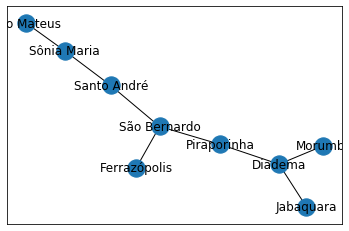

In [18]:
nx.draw_networkx(dic_gf_metro['EMTU'])
dic_gf_metro['EMTU'].nodes()

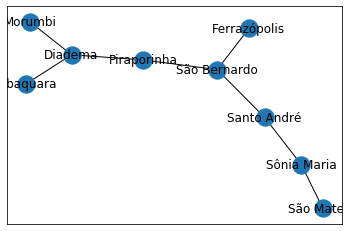

In [26]:
nx.draw_networkx(dic_gf_metro['EMTU'])

In [34]:
teste = nx.Graph()

for f in dic_gf_metro.values():
    
    teste = nx.compose(teste, f)


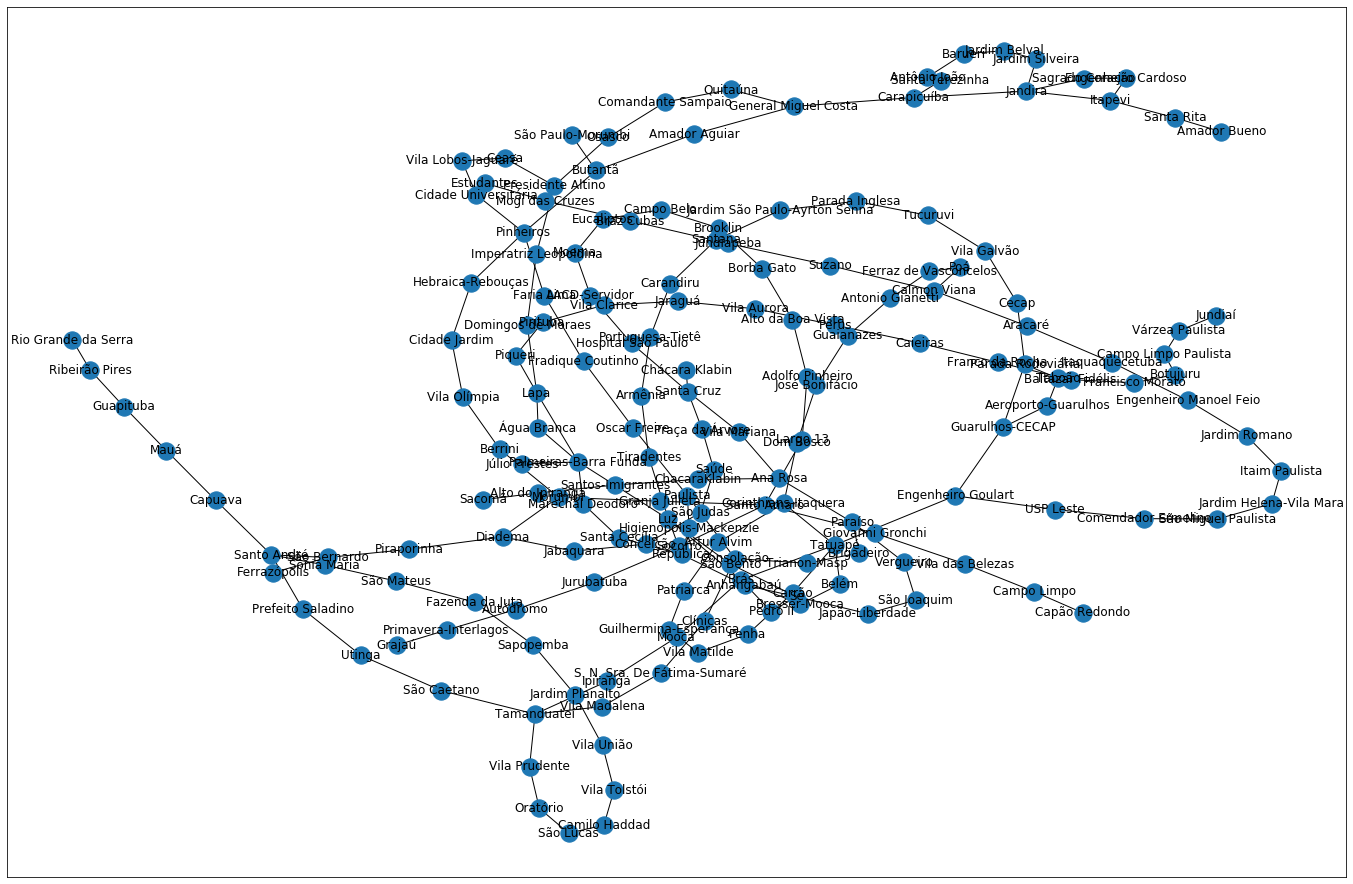

In [35]:
from matplotlib import pyplot as plt

plt.figure(figsize=(24, 16))

nx.draw_networkx(teste)

plt.show()